# Sentiment Analyzer #

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def common_tokens():
    # This function was only used to find interesting tokens, but is obsolete for the rest of the program.
    
    nltk.download(["stopwords", "twitter_samples", "vader_lexicon"])

    tweets = nltk.corpus.twitter_samples.strings()
    tknzr = nltk.tokenize.casual.TweetTokenizer(strip_handles = True)
    tweet_tokens = tknzr.tokenize(str(tweets))
    tweet_tokens = [token.lower().strip(" ….:,;-_!?[]()“”'\/=-+@*~%&").replace('"', '') for token in tweet_tokens]
    tweet_tokens = list(filter(None, tweet_tokens))

    stopwords = nltk.corpus.stopwords.words("english")
    filtered_tweets = []
    filtered_tweets.extend([token for token in tweet_tokens if token not in stopwords])

    fd = nltk.FreqDist(filtered_tweets)
    tweets_fd = fd.most_common(100)
    
    return None

In [2]:
def keyword_tweets(keyword):
    tweet_sent = nltk.corpus.twitter_samples.tokenized()
    tweet_sent = [[string.lower() for string in tweet] for tweet in tweet_sent]
    tweet_sent_tokens = []
    for tweet in tweet_sent:
        for string in tweet:
            if string == keyword:
                tweet_sent_tokens += [" ".join(tweet)]
                
    return tweet_sent_tokens

In [3]:
def sentiments(tweet_sent_tokens):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(str(tweet_sent_tokens))
    for (key, value) in score.items():
        if key == 'neg':
            negative = value
        elif key == 'pos':
            positive = value
    
    return [negative, positive]

In [4]:
def twitter_plot(pre_axes, keywords):
    figure, ax = plt.subplots(1, 2, figsize=(20, 6))
    figure.suptitle("Sentiment Analysis")
    
    x = keywords
    y = [value for (key, value) in pre_axes]
    z = [key for (key, value) in pre_axes]
    
    ax[0].bar(x, y, color = 'r', label = 'plus positive')
    ax[0].bar(x, z, color = 'b', label = 'negative')
    ax[0].legend(loc='best')
    
    ax[1].plot(x, y, label = 'positive')
    ax[1].plot(x, z, label = 'negative')
    ax[1].legend(loc='best')
    
    plt.show()

[nltk_data] Downloading package stopwords to /home/once/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/once/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/once/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


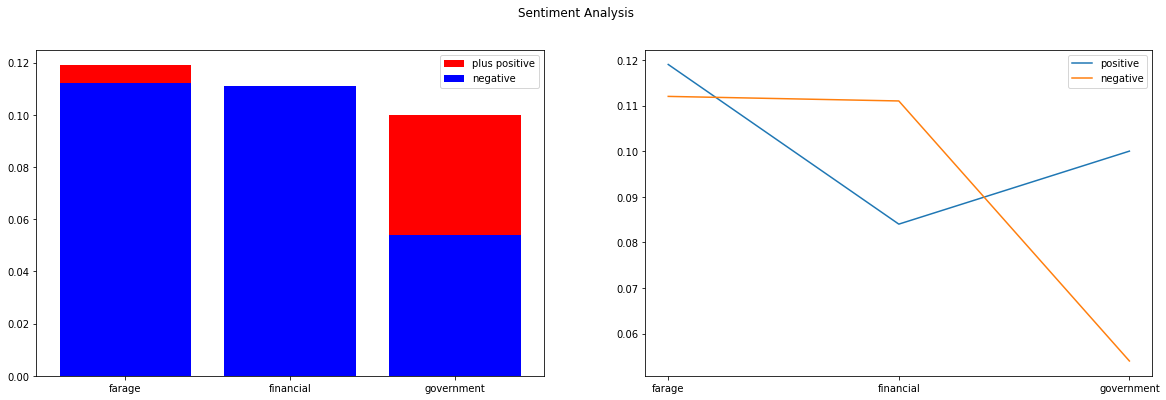

In [5]:
common_tokens()
keywords = ['farage', 'financial', 'government']
pre_axes = []

tweet_sent_tokens = keyword_tweets(keywords[0])
pre_axes.extend([sentiments(tweet_sent_tokens)])

tweet_sent_tokens = keyword_tweets(keywords[1])
pre_axes.extend([sentiments(tweet_sent_tokens)])

tweet_sent_tokens = keyword_tweets(keywords[2])
pre_axes.extend([sentiments(tweet_sent_tokens)])

twitter_plot(pre_axes, keywords)

The stacked bar plot looks unsatisfying because of the middle dataset connected to the lexeme _financial_. To counteract this issue and visualize the data properly the additional plot was created.

It would be interesting to compare a current extract of twitter with this analysis. If this sentiment analysis is accurate, approval rates of politicians or the governement in general can be computed very easily. At least from the point of view of a specific socialmedia platform.

Unfortunately I ran out of time, otherwise I would have tried to make the program more beautiful. 
This was insightful and a lot of fun though :)